# Clase 5: Visualización con la librería seaborn

Seaborn es una librería de visualizaciones estadísticas la cual está construida por sobre matplotlib. Esto último quiere decir que utiliza todos los elementos primitivos de matplotlib para hacer visualizaciones más atractivas que las que implementa matplotlib por defecto. Esta librera esa en funcionamiento desde diciembre del 2013, y provee múltiples gráficos para visualizar variables numéricas y categóricas. En esta clase vamos a ver la mayoría de estos métodos y aplicarlos en múltiples sets de datos.


# ¿Cómo empezamos a trabajar con seaborn?

En este caso, la recomendación va por instalar anaconda [(link)](https://www.anaconda.com/products/individual), la cual viene con un conjunto de librerías preinstaladas para computación científica y Data Science. Con esto la instalación y/o actualización de esta librería puede realizar con cualquiera de estos dos simples comandos:

1.- Utilizando el gestor de paquetes de anaconda
```bash
conda install seaborn
```
2.- Utilizando el gestor de paquetes de python (pip)
```bash
pip install seaborn
```

**Nota:** Al igual que con `matplotlib`, esta librería viene preinstala en las sesiones de google colab

Una vez instalado, para poder empezar a graficar necesitamos importar la librería, usualmente con el alias `sns` de la siguiente manera. Luego se llama al metodo `sns.set()` para activar la paleta de colores y estilos de gráficos de seaborn.
Además de esto, importamos la librería de matplotlib (`import matplotlib.pyplot as plt`) debido a lo que detallamos anteriormente (seaborn está construido sobre matplotlib)

```python
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline # Este activa el backend para jupyter, mostrando los gráficos en los resultados de las celdas
```


In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
sns.__version__ #Revisamos que estemos en la ultima versión de seaborn

'0.11.0'

In [3]:
# Importamos las librerias adicionales para el manejo numerico y de DataFrame
import numpy as np
import pandas as pd

Vamos a realizar un primer gráfico, pero con `matplotlib`. Esto lo realizamos para mostrar el antes y después del método `sns.set()`. En este caso graficando una curva con el método `plt.plot`:

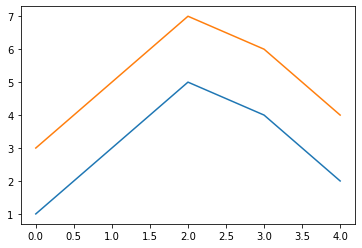

In [4]:
plt.plot([1,3,5,4,2])
plt.plot([3,5,7,6,4])
plt.show()

Ahora aplicaremos el método `sns.set()` con los parámetros por defecto. Como tal, este método es un alias del método `sns.set_theme()` y por lo mismo, se pueden utilizar ambos de la misma forma.

Los principales parámetros que reciben son los siguientes:

- 'context': Corresponde al contexto en que se presentaran los gráficos, y esto se traduce en un escalamiento de las figuras y artistas que la componen. Los posibles valores son: `['paper', 'notebook', 'talk', 'poster']` y estos llevan una escala de `[0.8, 1, 1.3, 1.6]` respectivamente.
- 'style': Controla la estética del gráfico. Principalmente manejo de fondos y la inserción de grillas. Los posibles valores son:`['darkgrid', 'whitegrid', 'dark' ,'white']`
- 'palette': Controla la paleta de colores a utilizar. En este caso, se cambian los colores que vienen por defecto de matplotlib, con múltiples opciones las cuales pueden ser:
    - Nombre de una paleta de seaborn ('deep','muted','bright','pastel','dark','colorblind')
    - Nombre de un colormap de matplotlib
    - Paletas de [husl](https://seaborn.pydata.org/generated/seaborn.husl_palette.html)
    - Paletas de [cubehelix](https://seaborn.pydata.org/generated/seaborn.cubehelix_palette.html) [Paletas de cubehelix](https://jiffyclub.github.io/palettable/cubehelix/)
- 'font': Controla cual font (o tipo de letra para el texto a graficar) se va a utilizar. Para saber cuáles son los *font* instalados, se puede utilizar la siguiente secuencia de comandos de python:

```python
import matplotlib.font_manager
matplotlib.font_manager.findSystemFonts(fontpaths=None, fontext='ttf')
```


Finalmente, en manejos de estilos uno puede utilizar el método `plt.xkcd()`. **¿Se les ocurre que puede generar este estilo :)?**

**Nota:** Para revertir esto último (y toda la aplicación del método `sns.set()`), pueden utilizar el método `plt.rcdefaults()`.


In [5]:
# Con esta función de puede ver el nombre de las letras que se tienen instaladas.

import matplotlib.font_manager
matplotlib.font_manager.findSystemFonts(fontpaths=None, fontext='ttf')

['C:\\Windows\\Fonts\\LEELAWAD.TTF',
 'C:\\Windows\\Fonts\\comicz.ttf',
 'C:\\Windows\\Fonts\\ACaslonPro-Regular.otf',
 'C:\\Windows\\Fonts\\RosewoodStd-Regular.otf',
 'C:\\Windows\\Fonts\\OCRAStd.otf',
 'C:\\Windows\\Fonts\\AdobeNaskh-Medium.otf',
 'C:\\Windows\\Fonts\\MyriadPro-SemiboldIt.otf',
 'C:\\Windows\\Fonts\\BOD_CB.TTF',
 'C:\\Windows\\Fonts\\GARA.TTF',
 'C:\\Windows\\Fonts\\ARIALNBI.TTF',
 'C:\\Windows\\Fonts\\KozGoPr6N-Light.otf',
 'C:\\Windows\\Fonts\\segoescb.ttf',
 'C:\\Windows\\Fonts\\seguisbi.ttf',
 'C:\\Windows\\Fonts\\msjhl.ttc',
 'C:\\Windows\\Fonts\\COPRGTB.TTF',
 'C:\\Windows\\Fonts\\segoeuib.ttf',
 'C:\\Windows\\Fonts\\CENTURY.TTF',
 'C:\\Windows\\Fonts\\LSANSD.TTF',
 'C:\\Windows\\Fonts\\AGaramondPro-Regular.otf',
 'C:\\Windows\\Fonts\\CooperBlackStd.otf',
 'C:\\Windows\\Fonts\\BOD_CR.TTF',
 'C:\\Windows\\Fonts\\MOD20.TTF',
 'C:\\Windows\\Fonts\\timesbi.ttf',
 'C:\\Windows\\Fonts\\COOPBL.TTF',
 'C:\\Windows\\Fonts\\SCRIPTBL.TTF',
 'C:\\Windows\\Fonts\\palai.ttf'

In [6]:
sns.set(context='notebook',style='darkgrid',palette='dark')

En este caso, ahora en adelante todos los gráficos que utilicemos van a tener el formato que nosotros definimos con el método `sns.set()`

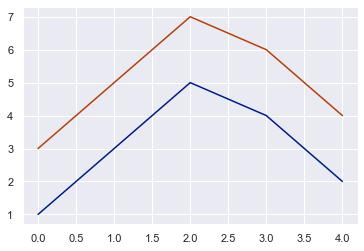

In [7]:
plt.plot([1,3,5,4,2])
plt.plot([3,5,7,6,4])
plt.show() #Nuestras lineas ahora tendran una grilla visible y un color mas oscuro para la paleta de colores

Vamos a importar múltiples datasets para poder graficar múltiples tipos de datos y así explorar las opciones que nos entrega `seaborn`. En primer lugar, vamos a importar el set de datos de pingüinos:

In [8]:
penguins_df = pd.read_csv("http://srodriguez.me/Datasets/penguins.csv").dropna()
penguins_df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male


El segundo set de datos, corresponde a las temperaturas máximas diarias, en distintas localidades de Australia:

In [9]:
path = "http://srodriguez.me/Datasets/daily_temps.csv"
temps_df = pd.read_csv(path)
temps_df.Date = pd.to_datetime(temps_df.Date)
temps_df.sample(5)

,Unnamed: 0,Product code,Bureau of Meteorology station number,Year,Month,Day,max_tmp_day,Days of accumulation of maximum temperature,Quality,City,Date
131,131,IDCJAC0010,23000,2019,5,12,16.7,1.0,Y,adelaide,2019-05-12
2141,2141,IDCJAC0010,86338,2019,11,13,17.3,1.0,N,melbourne,2019-11-13
876,876,IDCJAC0010,70351,2019,5,27,9.1,1.0,Y,canberra,2019-05-27
1621,1621,IDCJAC0010,94029,2019,6,11,17.6,1.0,Y,hobart,2019-06-11
96,96,IDCJAC0010,23000,2019,4,7,22.9,1.0,Y,adelaide,2019-04-07


# Diagramas de dispersión (Scatterplot)

A diferencia de la clase de matplotlib, el "hola mundo" que vamos a realizar con seaborn corresponde a los diagramas de dispersión. Vamos a explorar el cómo crear estos diagramas, pero también vamos a explorar las ventajas que ofrece seaborn aparte de generar estilos con una buena estética. En primer lugar, vamos a graficar utilizando el set de datos de los pingüinos de palmer las columnas `bill_length_mm` `bill_depth_mm`. En este caso, la primera alternativa a realizar corresponde a utilizar lista/arreglos/series para los parámetros `x` e `y`. Luego, para graficar utilizamos el método `sns.scatterplot(x=X,y=Y)`

[Documentación Scatterplot](https://seaborn.pydata.org/generated/seaborn.scatterplot.html?highlight=scatterplot#seaborn.scatterplot)



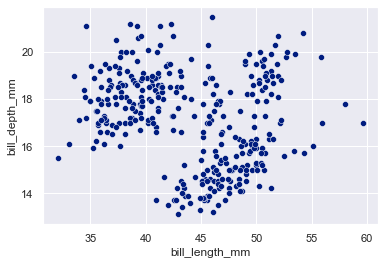

In [10]:
#Tal como matplotlib, solo tenemos que llamar al método de scatterplot, y definir nuestros parametros. 
#En este caso va a haber una diferencia crucial
sns.scatterplot(x=penguins_df['bill_length_mm'], y = penguins_df['bill_depth_mm'])
plt.show()

Si se fijan, automáticamente se añadieron las etiquetas para cada uno de los ejes X e Y. Esto sucede principalmente por que seaborn está pensado en una completa integración con pandas. En este caso como a los parámetros `x` e `y` son series de pandas (las cuales tienen un nombre asociado a la columna a la que corresponden), automáticamente seaborn va a generar las etiquetas en distintos niveles cuando correspondan. No obstante, nosotros de igual manera podríamos modificar cara elemento del gráfico utilizando todos los métodos vistos para matplotlib.

La otra forma de utilizar los métodos de seaborn, y que en este caso es la buena práctica, corresponde al uso del parámetro `data` el cual debería recibir un `DataFrame`. Este parámetro permitirá a `seaborn` consultar directamente a la fuente de datos con respecto a las columnas que existen en dicho `DataFrame`. Por lo mismo, nosotros ahora para definir nuestros parámetros `x` e `y` simplemente utilizaremos los nombres de las columnas presentes en nuestro `DataFrame`. Veamos el ejemplo:


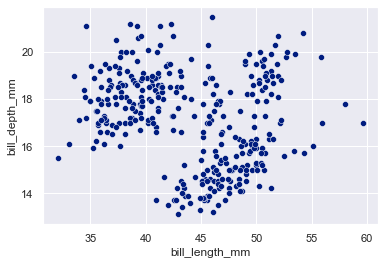

In [11]:
#Si bien esto genera el mismo gráfico que antes, esta sintaxis corresponde a una buena practica
sns.scatterplot(x='bill_length_mm', y = 'bill_depth_mm',data=penguins_df)
plt.show()

Tal como mencionábamos, `seaborn` está construido por sobre `matplotlib` y podemos utilizar ambas librerías obteniendo lo mejor de ambas: La capacidad y facilidad de graficar con `seaborn` y el control total de nuestra visualización con `matplotlib`. 

A modo de ejemplo, vamos a utilizar los `subplots` de matplotlib para dividir el espacio a graficar y vamos a repetir ambos gráficos vistos anteriormente. Además de esto, vamos a añadir títulos a cada de uno de estos gráficos. La única diferencia ahora al momento de utilizar `seaborn` con subplots, es que nosotros tenemos que agregar el parámetro `ax` y el valor para este parámetro, corresponde al eje del subgráfico (`ax[0]` o `ax[0,0]` dependiendo de nuestra configuración).


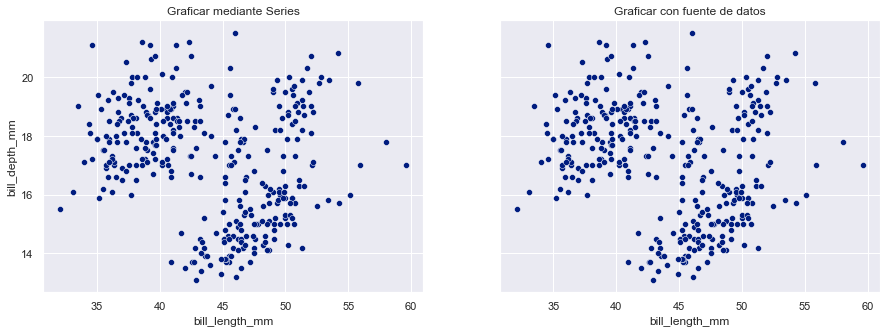

In [12]:
#Generamos nuestro subplots
fig, ax = plt.subplots(1,2, figsize=(15,5), sharey=True)
#Graficamos con el primer metodo en el primer subplot
sns.scatterplot(x=penguins_df['bill_length_mm'], y = penguins_df['bill_depth_mm'],ax=ax[0])
#Graficamos con el segundo metodo en el segundo subplot
sns.scatterplot(x='bill_length_mm', y = 'bill_depth_mm',data=penguins_df,ax=ax[1])

#Añadimos los titulos correspondientes.
ax[0].set_title("Graficar mediante Series")
ax[1].set_title("Graficar con fuente de datos")
plt.show()

Supongamos ahora que queremos colorear por la variable especie. Solo a modo de recordatorio se va a mostrar el código presentado en la clase 3:

```python
fig, ax = plt.subplots(1,1,figsize=(10,10))

sorted_df = iris_df.sort_values(['Species'])# Ordenamos el dataframe por Species

setosa_df = sorted_df.iloc[0:50 , :]  #Generamos una seccion del dataframe para iris setosa
versicolor_df = sorted_df.iloc[50:100 , :] # lo mismo para iris versicolor
virginica_df = sorted_df.iloc[100:150:, :] # y finalmente para iris virginica

color1 = "#f97306" # Naranjo en formato RGB Hexadecimal para Iris-Setosa       
color2 = 'Blue' # Azul en formato X11/CSS4 para Iris-Versicolor
color3 = 'xkcd:apple green' # "Verde manzana" en formato xkcd para Iris-Virginica

ax.scatter(setosa_df['PetalWidthCm'], setosa_df['PetalLengthCm'], color = color1, label='Setosa') #Scatter para Setosa, con solo una instancia del color y el label para setosa
ax.scatter(versicolor_df['PetalWidthCm'], versicolor_df['PetalLengthCm'], color = color2, label='Versicolor')  #Scatter para Versicolor
ax.scatter(virginica_df['PetalWidthCm'], virginica_df['PetalLengthCm'], color = color3, label='Virginica') #Scatter para Virginica

ax.legend() #Añadimos la leyenda, la cual va a respetar los colores utilizados.

plt.show()
```

Para pintar distintos colores, teníamos que llamar varias veces al método `ax.scatter` o en su defecto definir la lista de colores para cada uno de los puntos. Sea como sea, involucraba varias operaciones para poder llegar al resultado final. 

Utilizando seaborn, esto ahora es bastante más sencillo. Para colorear por una columna en específico, tenemos que utilizar el parámetro `hue` y el valor tiene que ser la columna como tal. Entonces el código que eran múltiples líneas, ahora queda resumido en una sola línea:


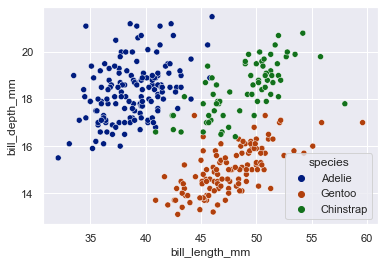

In [13]:
sns.scatterplot(x='bill_length_mm', y = 'bill_depth_mm',data=penguins_df, hue='species')
plt.show()

Aparte de pintar colores para cada uno de los puntos de forma rápida y sencilla, `seaborn` por defecto añade la leyenda asociada a cada uno de los colores pintados en el gráfico. En el mismo estilo para manipular colores, las distintas formas de los marcadores pueden modificado con un simple parámetro: `style`. De la misma forma, los distintos marcadores se agregarán a la leyenda del gráfico.

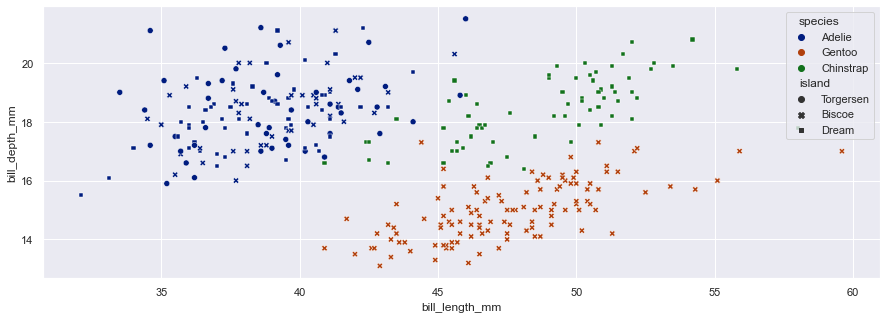

In [14]:
plt.figure(figsize=(15,5))
sns.scatterplot(x='bill_length_mm', y = 'bill_depth_mm',data=penguins_df,hue='species', style='island')
plt.show()

Finalmente, podemos agregar una dimensión más a nuestro gráfico asignándole tamaño a cada uno de los puntos según una columna. **Ojo** que la columna puede ser tanto numérica, como valores categóricos, las cuales seaborn manejara automáticamente la escalas de estas. Los parámetros a utilizar son `size` para asignar la columna y `sizes` para definir los valores mínimos y máximos de los tamaños asociados al gráfico. Este último parámetro corresponde a una tupla/arreglo de dos elementos con el valor mínimo y máximo.

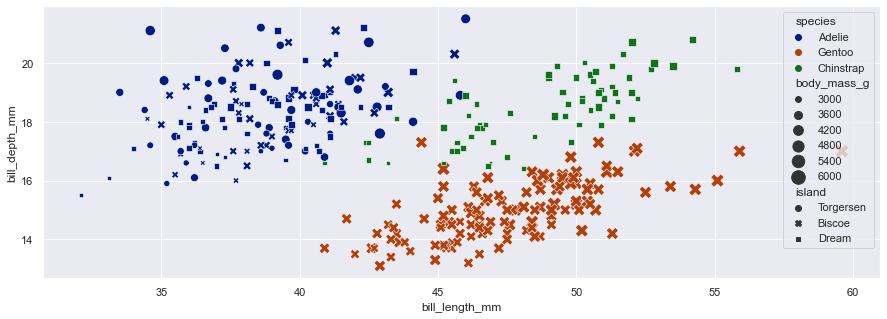

In [15]:
plt.figure(figsize=(15,5))
#Vamos agregando
sns.scatterplot(x='bill_length_mm', y = 'bill_depth_mm',data=penguins_df,hue='species', style='island', size="body_mass_g",sizes=(20, 200))
plt.show()

Podemos ver que nuestra leyenda está generando problemas debido a lo grande que es (bloquea un par de puntos). Cuando nosotros llamamos algún método de `seaborn` para graficar, este por defecto va a retornar un objeto artista de `matplotlib`. Entonces, nosotros podemos aprovechar la interfaz orientada a objetos para modificar específicamente el gráfico retornado:

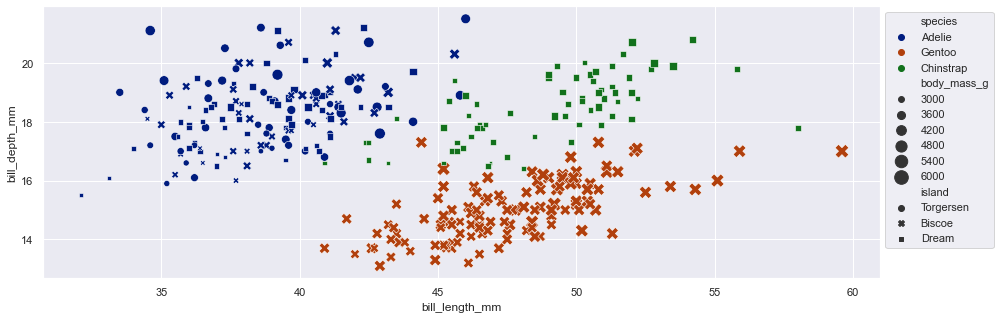

In [16]:
plt.figure(figsize=(15,5))
# Vamos a guardar el artista retornado en la variable ax
ax = sns.scatterplot(x='bill_length_mm', y = 'bill_depth_mm',data=penguins_df,hue='species', style='island', size="body_mass_g",sizes=(20, 200))
# y modificamos el "bounding box" de la leyenda desplazandola a la derecha 
ax.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.show()


# Gráficos de barras

Para generar gráficos de barras tenemos múltiples opciones utilizando seaborn, pero siempre con la misma lógica de llamar simplemente a un método y obtener el gráfico asociado. En este caso el primer método corresponde a `sns.barplot(x=X,y=Y,data=df,ci='sd)`, el cual nos generara un gráfico de barras asociados a las variables que nosotros asignemos. Una cosa a notar es el parámetro `ci` el cual hace mención a intervalo de confianza, y que nosotros le hemos dado el valor de `'sd'`. Este método realizara una agregación de forma automática al momento de graficar:

[Documentación Barplot](https://seaborn.pydata.org/generated/seaborn.barplot.html?highlight=barplot#seaborn.barplot)


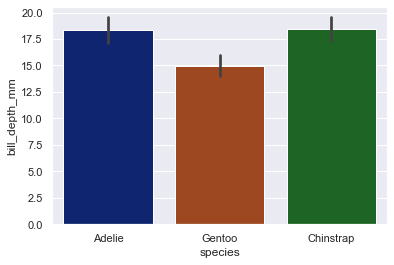

In [17]:
sns.barplot(x='species', y ='bill_depth_mm', ci='sd',
            data=penguins_df)
plt.show()

**¿Qué será lo que está graficando?**

In [18]:
penguins_df.groupby("species")['bill_depth_mm'].agg(['mean','std'])

,mean,std
species,,
Adelie,18.347260,1.219338
Chinstrap,18.420588,1.135395
Gentoo,14.996639,0.985998


La respuesta es el promedio y la desviación estándar para dichas columnas. Nosotros podríamos cambiar el método de agregación utilizando el parámetro `agg` y asignándole como valor una función. Ejemplo de una modificación donde muestre el conteo de elementos no nulos y sin barras de "error":

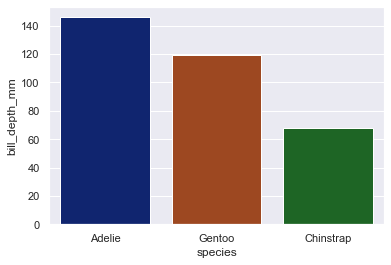

In [19]:
# Dejamos el parametro ci=None para que evite calcular un intervalo de confianza
# y modificamos la función de agregación presente en el parametro `estimator`
sns.barplot(x='species', y ='bill_depth_mm', ci=None, estimator=pd.Series.count, 
            data=penguins_df)
plt.show()

Alternativamente, existe un método genérico asociado a las variables categorías llamado: `sns.catplot`. Este método puede generar gráficos asociados a las variables categóricas de distinto tipo, utilizando el parámetro `kind` y para generar el primer gráfico de barra visto, simplemente declaramos `kind="bar"`:

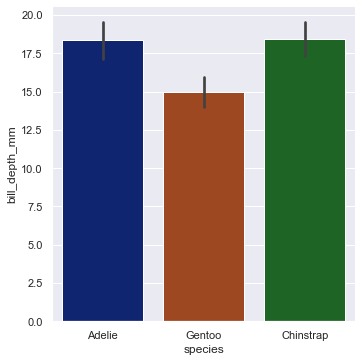

In [20]:
sns.catplot(x="species", y="bill_depth_mm", kind="bar", data=penguins_df,ci='sd')
plt.show()

Además de `sns.barplot` y `sns.catplot`, tenemos el método `sns.countplot` el cual cuenta los elementos no nulos en las columna a graficar.

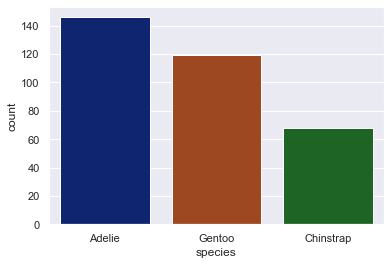

In [21]:
sns.countplot(x='species',data=penguins_df)
plt.show()

Y a su vez, existe el `kind=count` en el método `sns.catplot`

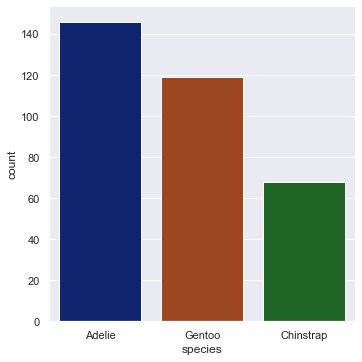

In [22]:
sns.catplot(x="species", kind="count", data=penguins_df)

# Matriz de correlación y Mapas de calor (Heatmap)

Utilizando matplotlib, generar un mapa de calor con anotaciones eran varias líneas de código, era difícil que los valores numéricos quedaran correctamente alineados al centro de cada valor de heatmap, y eran varios métodos para construir un heatmap de principio a fin. `seaborn` implementa el método `sns.heatmap(data)`, el cual realiza todas las operaciones necesarias para generar un mapa de calor. El parametro `data` puede ser tanto un `DataFrame` o una matriz de numpy, recordar que si utilizamos un `DataFrame`, `seaborn` va a extraer los nombres de las filas y columnas asociadas a la matriz a graficar.

Además, utilizando el parámetro `annot=True`, permitimos generar un heatmap con anotaciones. Estas anotaciones estarán correctamente alineadas y el uso de color se generará automáticamente para una máxima lecturabilidad de las anotaciones:

[Documentación Heatmap](https://seaborn.pydata.org/generated/seaborn.heatmap.html?highlight=heatmap#seaborn.heatmap)


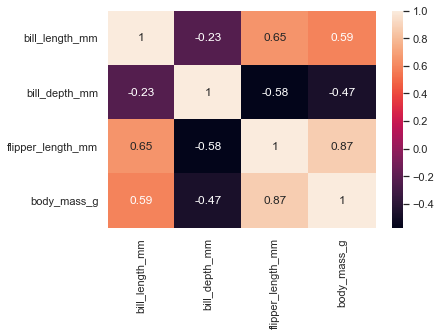

In [23]:
corr = penguins_df.corr() # Obtenemos la matriz de correlación para las variables númericas del set de datos de pingüinos

sns.heatmap(corr,annot=True) #Generamos el heatmap anotado
plt.show()

# Histogramas

Recientemente, en la última versión (0.11) de seaborn se implementó el método `histplot`. Tal como lo menciona el título de esta sección, corresponde al uso de histogramas, y la lógica de uso se mantiene. Existe un parámetro, el cual corresponde a `kde`, el cual recibe un valor `Booleano` y nos permite graficar el *Kernel Density Estimate*. Esta característica permite estimar una distribución continua desde el histograma, y por lo mismo podríamos ver la existencia de asimetría presente en los datos a graficar.

[Documentación Histplot](https://seaborn.pydata.org/generated/seaborn.histplot.html?highlight=histplot#seaborn.histplot)


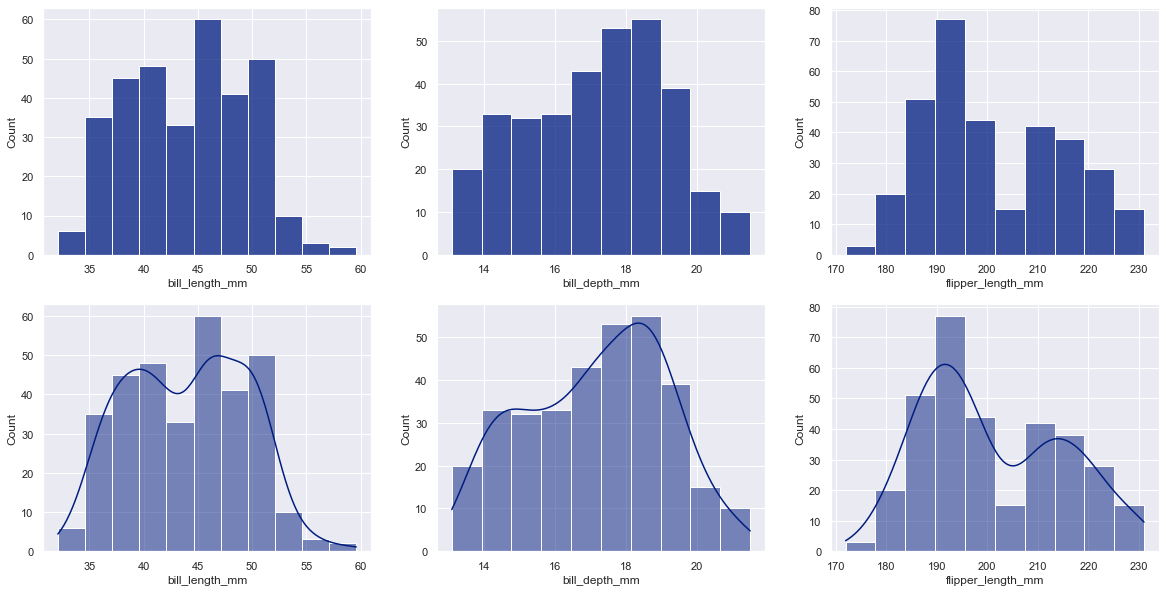

In [24]:
fig, ax = plt.subplots(2,3, figsize=(20,10), )
# subplots con el método histoplot a secas
sns.histplot(x='bill_length_mm', data = penguins_df, ax = ax[0,0])
sns.histplot(x='bill_depth_mm', data = penguins_df, ax = ax[0,1])
sns.histplot(x='flipper_length_mm', data = penguins_df, ax = ax[0,2])
#subplots con el método histplot y el gráfico de KDE
sns.histplot(x='bill_length_mm', data = penguins_df, kde=True, ax = ax[1,0])
sns.histplot(x='bill_depth_mm', data = penguins_df, kde=True, ax = ax[1,1])
sns.histplot(x='flipper_length_mm', data = penguins_df, kde=True, ax = ax[1,2])
plt.show()

<AxesSubplot:xlabel='bill_length_mm', ylabel='Density'>

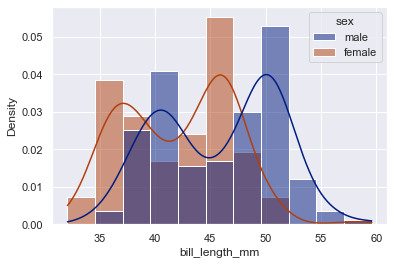

In [54]:
sns.histplot(x='bill_length_mm', hue='sex', data = penguins_df, kde=True, stat='density', common_norm=True)

<AxesSubplot:xlabel='bill_length_mm', ylabel='Density'>

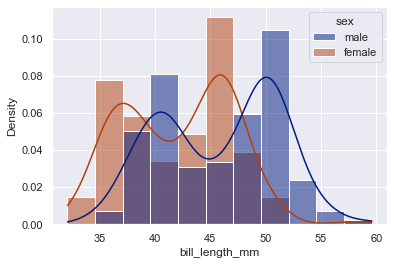

In [53]:
sns.histplot(x='bill_length_mm', hue='sex', data = penguins_df, kde=True, stat='density', common_norm=False)

<AxesSubplot:xlabel='bill_length_mm', ylabel='Density'>

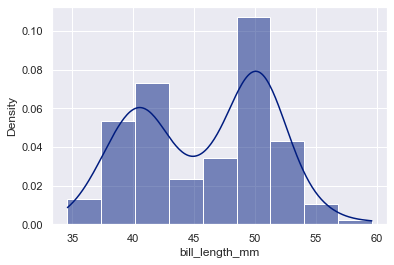

In [52]:
sns.histplot(x=penguins_df[penguins_df['sex'] == 'male']['bill_length_mm'], kde=True, stat='density')

# Diagramas de caja y bigotes (Boxplots)

`seaborn`, como buena librería de cómputo estadístico también provee el método para realizar diagramas de cajas y bigotes. Las ventajas siguen siendo la facilidad de uso de `seaborn` por sobre `matplotlib`, además de la mejora estética al momento de uso de colores, y modificaciones a los marcadores de outlets:

[Documentación Boxplots](https://seaborn.pydata.org/generated/seaborn.boxplot.html?highlight=boxplot#seaborn.boxplot)


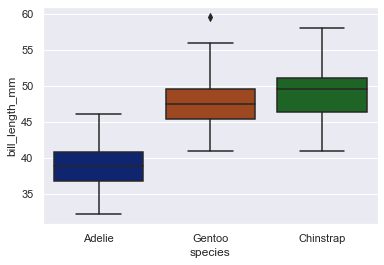

In [24]:
sns.boxplot(x='species',y='bill_length_mm',data=penguins_df)
plt.show()

Recordando que al estar utilizando `seaborn`, podemos hacer la separación de nuestros gráficos según las columnas que nosotros especifiquemos. A modo de ejemplo, separaremos los boxplots obtenidos anteriormente por la columna `sex`:

<AxesSubplot:xlabel='species', ylabel='flipper_length_mm'>

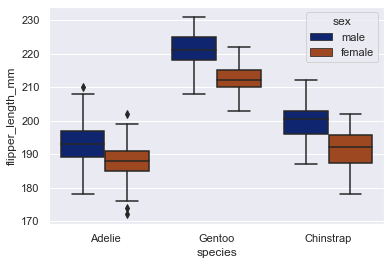

In [25]:
sns.boxplot(x='species',y='flipper_length_mm',data=penguins_df,hue='sex')

# Diagramas de violín (violinplots)

Los diagramas de violín corresponden a un tipo de grafico similar al gráfico de caja y bigotes. En este caso se muestra una barra interna con un punto blanco, donde este punto corresponde a la mediana, y el largo de la barra corresponden a $Q1$ y $Q3$. Se muestra además con unas líneas la misma cobertura de los bigotes, pero la gran diferencia es que el diagrama de violín muestra una estimación de la distribución a través de los distintos valores a graficar. El método corresponde a `sns.violinplot(x=X,y=Y,data=df)`.

[Documentación Violinplot](https://seaborn.pydata.org/generated/seaborn.violinplot.html?highlight=violinplot#seaborn.violinplot)


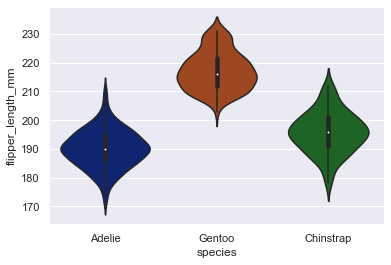

In [28]:
sns.violinplot(x='species',y='flipper_length_mm',
               data=penguins_df)
plt.show()

Al igual que los boxplots, nosotros podemos separar cada *violinplot* según el parámetro `hue`. Adicionalmente, nosotros podemos utilizar el parámetro `split=True` en conjunto con `hue` para poder presentar de forma divida en un mismo violin, las distintas distribuciones por la que estamos separando según la columna `hue`:

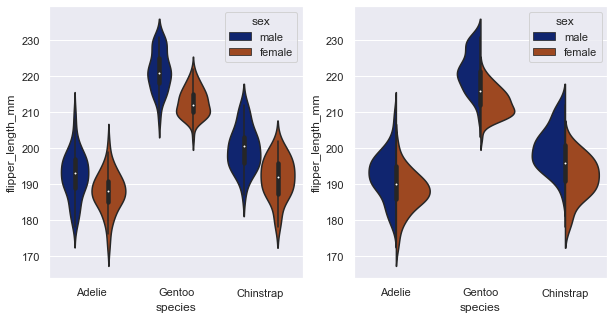

In [29]:
fig, ax = plt.subplots(1,2, figsize=(10,5))
sns.violinplot(x='species',y='flipper_length_mm',data=penguins_df,hue='sex', ax = ax[0])
sns.violinplot(x='species',y='flipper_length_mm',data=penguins_df,hue='sex', split=True, ax = ax[1])
plt.show()

# Diagramas de Líneas (lineplot)

Para este tipo de gráfico vamos a utilizar el set de datos de la temperatura y el método `sns.lineplot`. Tal como el método de `sns.barplot`, `seaborn` si es que tiene la oportunidad, va a hacer agregación de los datos dependiendo de cómo nosotros presentemos los datos, el uso de los parametros `hue` y posibles valores dependientes de categorías (en este caso, como tenemos 8 ciudades de Australia, vamos a tener 8 mediciones de temperatura para cada día). 

[Documentación Lineplot](https://seaborn.pydata.org/generated/seaborn.lineplot.html?highlight=lineplot#seaborn.lineplot)


In [59]:
temps_df

,Unnamed: 0,Product code,Bureau of Meteorology station number,Year,Month,Day,max_tmp_day,Days of accumulation of maximum temperature,Quality,City,Date
0,0,IDCJAC0010,23000,2019,1,1,32.4,1.0,N,adelaide,2019-01-01
1,1,IDCJAC0010,23000,2019,1,2,33.6,1.0,N,adelaide,2019-01-02
2,2,IDCJAC0010,23000,2019,1,3,41.5,1.0,N,adelaide,2019-01-03
3,3,IDCJAC0010,23000,2019,1,4,26.8,1.0,N,adelaide,2019-01-04
4,4,IDCJAC0010,23000,2019,1,5,23.1,1.0,N,adelaide,2019-01-05
...,...,...,...,...,...,...,...,...,...,...,...
2915,2915,IDCJAC0010,66062,2019,12,27,27.0,1.0,N,sydney,2019-12-27
2916,2916,IDCJAC0010,66062,2019,12,28,28.7,1.0,N,sydney,2019-12-28
2917,2917,IDCJAC0010,66062,2019,12,29,26.3,1.0,N,sydney,2019-12-29
2918,2918,IDCJAC0010,66062,2019,12,30,27.3,1.0,N,sydney,2019-12-30


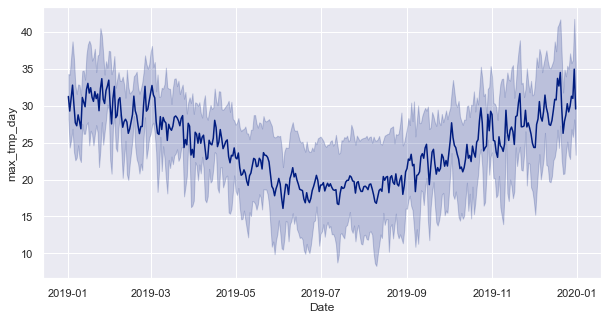

In [27]:
plt.figure(figsize=(10,5))
sns.lineplot(x='Date',y='max_tmp_day',data=temps_df,ci='sd') # Definimos el Intervalo de confianza como la desviación estandar
plt.show()

# Dinámica 1

Para esta dinámica revisitaremos el reciente set de datos de precios de casa de King County Housing. Recientemente aplicamos los análisis de regresión lineal para ver como podríamos modelar la variable dependiente según las variables presentes en este conjunto de datos. Ahora, realizaremos visualizaciones sencillas utilizando el conocimiento recientemente adquirido:

- Graficar la matriz de correlación para las distintas variables numéricas **nota:** el parámetro `fmt='.2f'` transformara el texto de anotaciones a 2 decimales máximo
- Utilizando subplots genere 4 histogramas de distintas variables presentes en el set de datos
- Utilizando subplots genere 2 boxplots y dos violinplots, comparando el precio para distintas variables (como por ej: 'grade', 'view', 'waterfront', 'bedrooms',etc). **¿Qué puede observar de esto?**
- utilizando subplots, genere 2 lineplots
    - Precio de las casas a través de los años que fueron construidas
    - Precio de las casas a través de los años que fueron construidas pero separadas por la columna **waterfront**


In [31]:
housing_df = pd.read_csv("http://srodriguez.me/Datasets/kc_house_data.csv")
housing_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [32]:
house = housing_df.drop(['id', 'zipcode', 'date'], axis = 1)

## Graficar la matriz de correlación para las distintas variables numéricas nota: el parámetro fmt='.2f' transformara el texto de anotaciones a 2 decimales máximo

<AxesSubplot:>

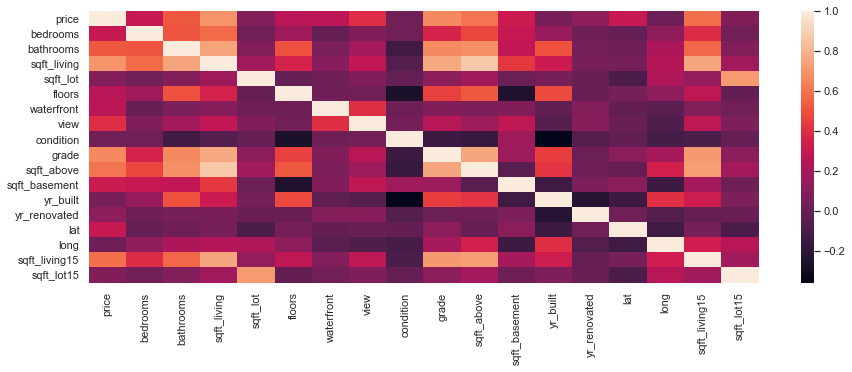

In [33]:
plt.figure(figsize=(15,5))

sns.heatmap(house.corr(), fmt='.2f')

## Utilizando subplots genere 4 histogramas de distintas variables presentes en el set de datos

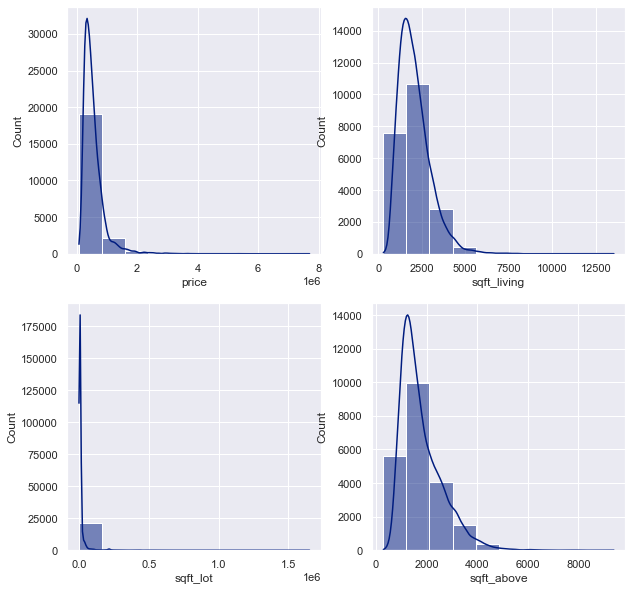

In [34]:
fig, ax = plt.subplots(2,2, figsize = (10, 10))

# Utilizando subplots genere 4 histogramas de distintas variables presentes en el set de datos

sns.histplot(x = 'price', data = housing_df, kde=True, bins = 10, ax = ax[0,0])
sns.histplot(x = 'sqft_living', data = housing_df, kde=True, bins = 10, ax = ax[0,1])
sns.histplot(x = 'sqft_lot', data = housing_df, kde=True, bins = 10, ax = ax[1,0])
sns.histplot(x = 'sqft_above', data = housing_df, kde=True, bins = 10, ax = ax[1,1])

plt.show()

## Utilizando subplots genere 2 boxplots y dos violinplots, comparando el precio para distintas variables (como por ej: 'grade', 'view', 'waterfront', 'bedrooms',etc). ¿Qué puede observar de esto?

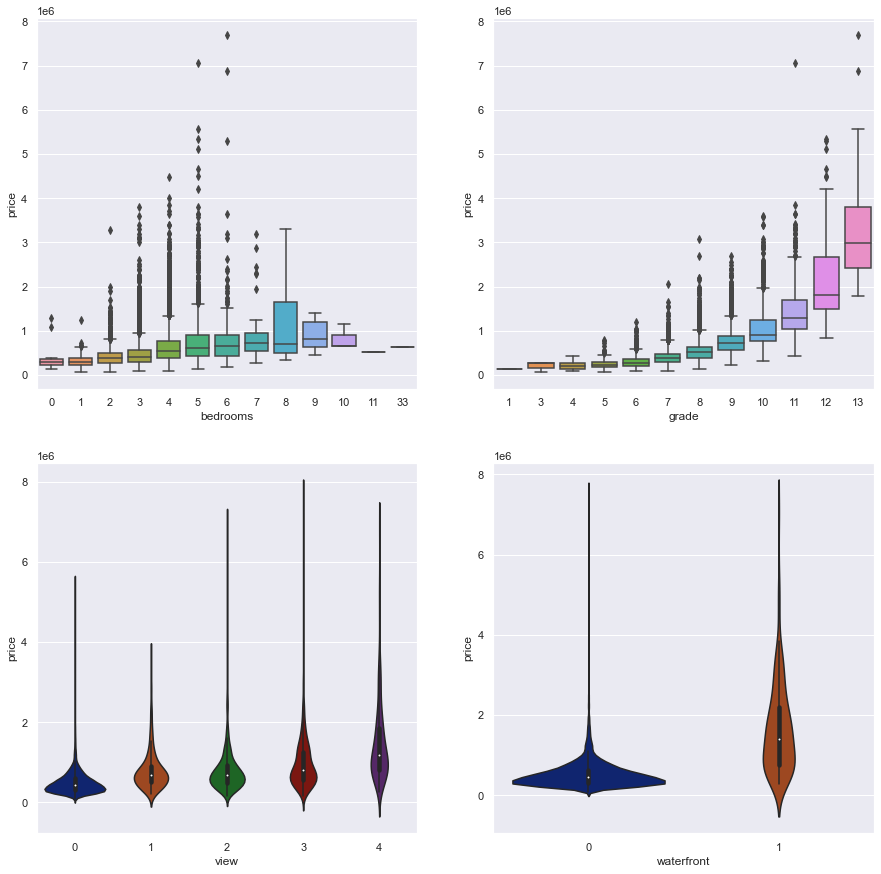

In [48]:
fig, ax = plt.subplots(2,2, figsize = (15,15))

sns.boxplot(x = 'bedrooms', y = 'price', data = housing_df, ax = ax[0,0])
sns.boxplot(x = 'grade', y = 'price', data = housing_df, ax = ax[0,1])

sns.violinplot(x = 'view', y = 'price', data = housing_df, ax = ax[1,0])
sns.violinplot(x = 'waterfront', y = 'price', data = housing_df, ax = ax[1,1])

plt.show()

### Reflexión

Con respecto a grade, se ve una clara tendencia al aumento del precio, inclusive los valores atipicos son cada vez más altos. Se asemeja a un forma exponencial, ya que es más pronunciada con valores más grandes.

Con respecto a la cantidad de bedrooms, se ve una leve tendencia al aumento hasta los 9 bedrooms. Llama la atención la gran cantidad de puntos atipicos. Este se puede deber a que hay más variables influyendo en el precio.

En view, llama la atención que al principio hay una campana muy pronunciada y esta se vaya aplanando conforme avanza. Todas cuentan con valores atípicos muy altos.

Con respecto a waterfront, las distribuciones son muy diferentes. Con 0 existe una moda clara dentro de la distribución, es decir, la mayor parte de las casas con waterfront tienen un precio cercano a los 300 mil usd.



### utilizando subplots, genere 2 lineplots.
1. Precio de las casas a través de los años que fueron construidas
2. Precio de las casas a través de los años que fueron construidas pero separadas por la columna waterfront

[]

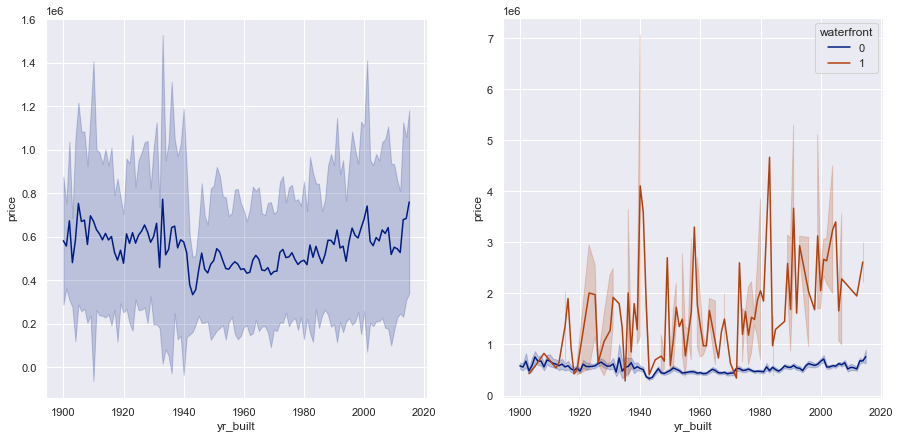

In [60]:
fig, ax = plt.subplots(1,2, figsize = (15,7))

sns.lineplot(x = 'yr_built', y = 'price', data = housing_df, ax = ax[0], ci = 'sd')

sns.lineplot(x = 'yr_built', y = 'price', data = housing_df, hue = 'waterfront', ax = ax[1])

plt.plot()

# Fin Dinámica 1

# Visualizaciones adicionales para datos categóricos. 

`seaborn` implementa dos alternativas para poder hacer gráficas categóricas utilizando puntos. La primera de estas corresponde a `sns.stripplot` y este método sitúa la variable categórica en el eje x y la variable cuantitativa en el eje y, mostrando con un punto cada uno de los valores. Para poder distinguir los puntos en el caso de que estén muy próximos, por defecto se aplica un "temblor" (jitter) a los puntos para separarlos del eje vertical de forma aleatoria:

[Documentación stripplot](https://seaborn.pydata.org/generated/seaborn.stripplot.html?highlight=stripplot#seaborn.stripplot)


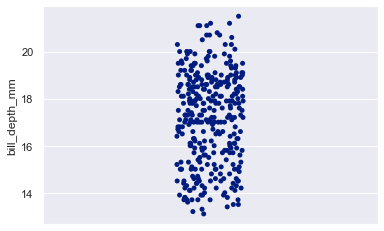

In [62]:
sns.stripplot(y ='bill_depth_mm', data=penguins_df)
plt.show()

ejemplo de un cambio en el parámetro `jitter`:

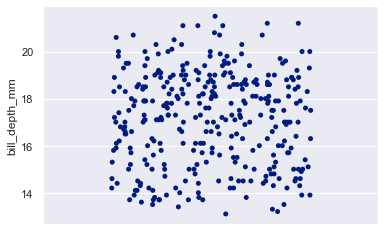

In [63]:
sns.stripplot(y ='bill_depth_mm', data=penguins_df, jitter=0.3)
plt.show()

Podemos adicionar valores categóricos para realizar la separación de los puntos según categoría.

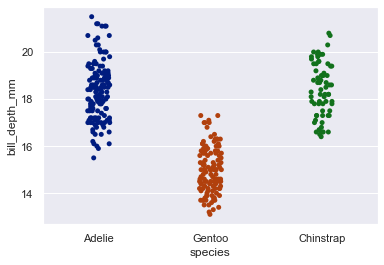

In [64]:
sns.stripplot(x='species',y ='bill_depth_mm', data=penguins_df)
plt.show()

El segundo método corresponde a swarmplot (Gráfico de enjambre). Para poder realizar este gráfico hay que utilizar el método `sns.swarmplot` y genera gráficos semejantes a las generadas por `sns.stripplot`, pero aplicando a la posición de los puntos cierto algoritmo de forma que no solapen. Esto ofrece una mejor visualización a costa de dejar de ser útil para conjuntos de datos muy grandes:

[Documentación Swarmplot](https://seaborn.pydata.org/generated/seaborn.swarmplot.html?highlight=swarmplot#seaborn.swarmplot)


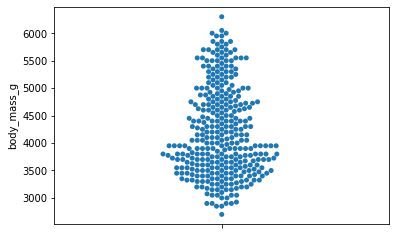

In [10]:
sns.swarmplot(y ='body_mass_g', data=penguins_df)
plt.show()

Podemos adicionar valores categóricos para realizar la separación de los puntos según categoría. (de la misma forma que el stripplot)

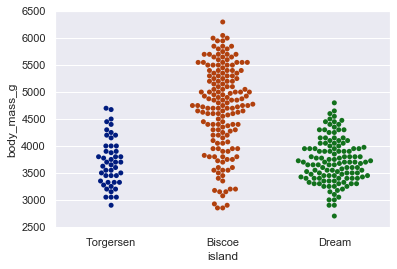

In [37]:
sns.swarmplot(x='island',y ='body_mass_g', data=penguins_df)
plt.show()

Y recordar que también podemos pintar los puntos, dependiendo de alguna columna de nuestro interés

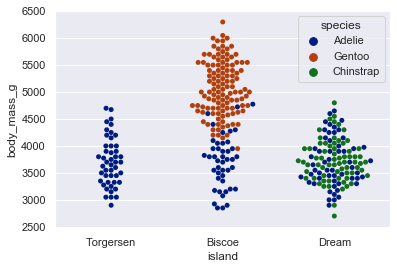

In [38]:
sns.swarmplot(x='island',y ='body_mass_g', data=penguins_df,hue="species")
plt.show()

# Dinámica 2

Para esta dinámica utilizaremos un set de datos de precios de diamantes. La mayoría de las variables son auto explicativas a excepción de las variables `x`, `y`, `z`. Básicamente, estas variables hacen referencia al largo alto y ancho del diamante respectivamente. La idea es implementar la mayoría de los gráficos que hemos visto, con un par de diferencias:

- Graficar la matriz de correlación para las distintas variables numéricas
- Utilizando subplots genere 7 histogramas para las siguientes variables: carat, depth, table, price, x , y , z
- Utilizando subplots genere 4 boxplots respetando las siguientes instrucciones:
    - Obtenga una muestra aleatoria del set de datos de los diamantes utilizando el método `diamonds_df.sample(100)`
    - Guarde esta muestra en una variable, utilícela para generar los gráficos
    - Genere los boxplots con una paleta de color pastel (puede que el parámetro `palette` puede ser de ayuda)
    - Para los dos primeros boxplots genere adicionalmente swarmplots para las mismas variables utilizadas que los boxplots (y el set de datos muestreado) **¿Surge algún warning de ejecución de codigo? ¿Que cree que pasaría si utilizara una muestra de 1000?**
    - Para los dos últimos boxplots, genere adicionalmente stripplots para las mismas variables utilizadas que los boxplots (y el set de datos muestreado) **¿Surge algún warning de ejecución de codigo?**
- utilizando subplots, genere 4 barplots
    - Cuente cuantos diamantes hay para cada corte (`cut`)
    - Cuente cuantos diamantes hay para cada color
    - Genere el gráfico de barras de precio promedio en relación con la claridad del diamante
    - Genere el gráfico de barras de precio acumulado total en relación a la claridad del diamante **¿Que función de numpy suma todos los elementos de un arreglo?**


In [72]:
diamonds_df = pd.read_csv("http://srodriguez.me/Datasets/diamonds.csv")
diamonds_df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [73]:
diamonds_df.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


# Graficar la matriz de correlación para las distintas variables numéricas

In [74]:
diamonds_df = diamonds_df.drop(['Unnamed: 0'], axis = 1)

[]

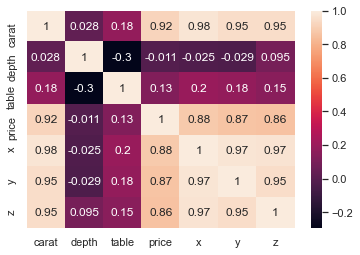

In [75]:
corr = diamonds_df.corr()
sns.heatmap(corr, annot = True)
plt.plot()

# Utilizando subplots genere 7 histogramas para las siguientes variables: carat, depth, table, price, x , y , z

[]

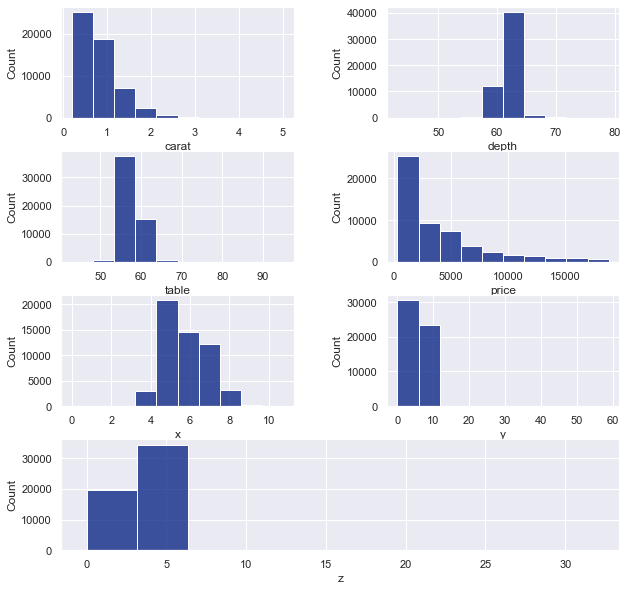

In [110]:
plt.figure(figsize = (10, 10))
grid = plt.GridSpec(4, 2, wspace=0.4, hspace=0.3)

graf = ['carat', 'depth', 'table', 'price', 'x' , 'y' , 'z']

k = 0
for i in range(grid.nrows - 1):
    for j in range(grid.ncols):
        ax = plt.subplot(grid[i,j])
        sns.histplot(x = graf[k] ,data = diamonds_df, ax = ax, bins = 10)
        k += 1
        
ax = plt.subplot(grid[3,:])
sns.histplot(x = 'z' ,data = diamonds_df, ax = ax, bins = 10)

plt.plot()

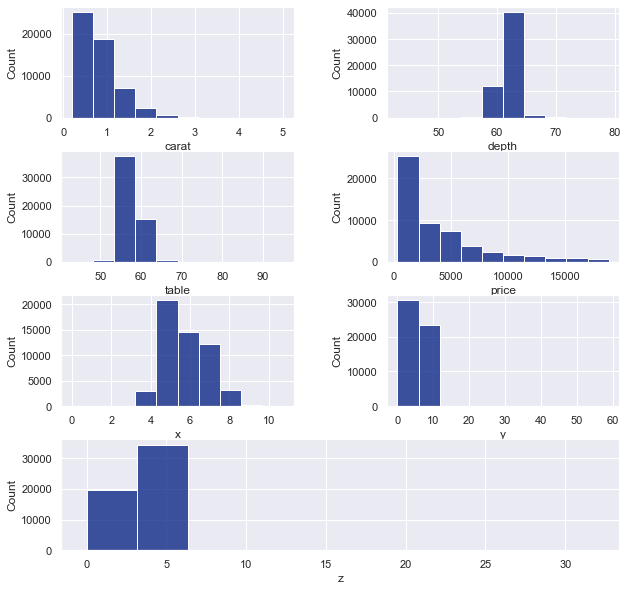

In [113]:
plt.figure(figsize = (10, 10))
grid = plt.GridSpec(4, 2, wspace=0.4, hspace=0.3)

ax = plt.subplot(grid[0,0])
sns.histplot(x = 'carat' ,data = diamonds_df, ax = ax, bins = 10)

ax = plt.subplot(grid[0,1])
sns.histplot(x = 'depth' ,data = diamonds_df, ax = ax, bins = 10)

ax = plt.subplot(grid[1,0])
sns.histplot(x = 'table' ,data = diamonds_df, ax = ax, bins = 10)

ax = plt.subplot(grid[1,1])
sns.histplot(x = 'price' ,data = diamonds_df, ax = ax, bins = 10)

ax = plt.subplot(grid[2,0])
sns.histplot(x = 'x' ,data = diamonds_df, ax = ax, bins = 10)

ax = plt.subplot(grid[2,1])
sns.histplot(x = 'y' ,data = diamonds_df, ax = ax, bins = 10)

ax = plt.subplot(grid[3,:])
sns.histplot(x = 'z' ,data = diamonds_df, ax = ax, bins = 10)

plt.show()

# Utilizando subplots genere 4 boxplots respetando las siguientes instrucciones:

    - Obtenga una muestra aleatoria del set de datos de los diamantes utilizando el método `diamonds_df.sample(100)`
    - Guarde esta muestra en una variable, utilícela para generar los gráficos
    - Genere los boxplots con una paleta de color pastel (puede que el parámetro `palette` puede ser de ayuda)
    - Para los dos primeros boxplots genere adicionalmente swarmplots para las mismas variables utilizadas que los boxplots (y el set de datos muestreado) **¿Surge algún warning de ejecución de codigo? ¿Que cree que pasaría si utilizara una muestra de 1000?**
    - Para los dos últimos boxplots, genere adicionalmente stripplots para las mismas variables utilizadas que los boxplots (y el set de datos muestreado) **¿Surge algún warning de ejecución de codigo?**

[]

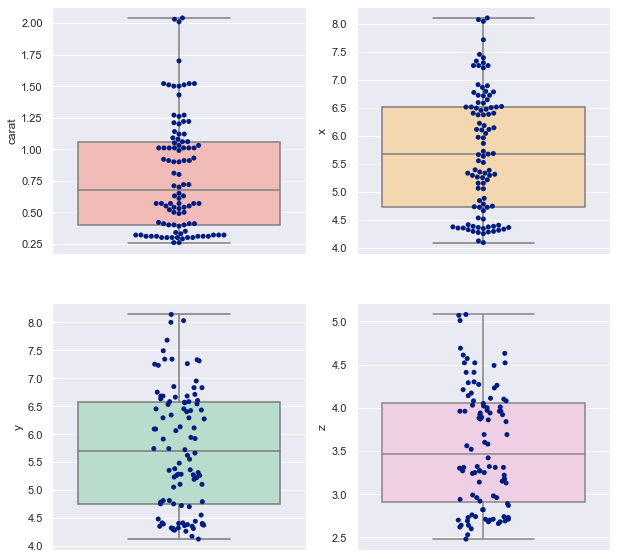

In [117]:
fig, ax = plt.subplots(2, 2, figsize = (10, 10))

# Muestra aleatoria y asignacion a d_s
d_s = diamonds_df.sample(100)

sns.boxplot(y = 'carat', data = d_s, ax = ax[0,0], palette = 'Pastel1')
sns.swarmplot(y = 'carat', data = d_s, ax = ax[0,0])

sns.boxplot(y = 'x', data = d_s, ax = ax[0,1], palette = 'Pastel1_r')
sns.swarmplot(y = 'x', data = d_s, ax = ax[0,1])

sns.boxplot(y = 'y', data = d_s, ax = ax[1,0], palette = 'Pastel2')
sns.stripplot(y = 'y', data = d_s, ax = ax[1,0])

sns.boxplot(y = 'z', data = d_s, ax = ax[1,1], palette = 'Pastel2_r')
sns.stripplot(y = 'z', data = d_s, ax = ax[1,1])

plt.plot()

# Para los dos primeros boxplots genere adicionalmente swarmplots para las mismas variables utilizadas que los boxplots (y el set de datos muestreado) ¿Surge algún warning de ejecución de codigo? ¿Que cree que pasaría si utilizara una muestra de 1000?

Quedaría muy sobrecargado. Quizás no se podrían mostrar todos los datos.

## Probando con 1000 datos ...

C:\Users\Hugo\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 37.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


[]

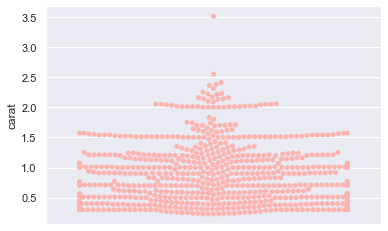

In [118]:
d_s2 = diamonds_df.sample(1000)

sns.swarmplot(y = 'carat', data = d_s2, palette = 'Pastel1')

plt.plot()

### Dice que un 37,6% de los puntos no pudieron ser ubicados.

# Utilizando subplots, genere 4 barplots
    - Cuente cuantos diamantes hay para cada corte (`cut`)
    - Cuente cuantos diamantes hay para cada color
    - Genere el gráfico de barras de precio promedio en relación con la claridad del diamante
    - Genere el gráfico de barras de precio acumulado total en relación a la claridad del diamante **¿Que función de numpy suma todos los elementos de un arreglo?**



[]

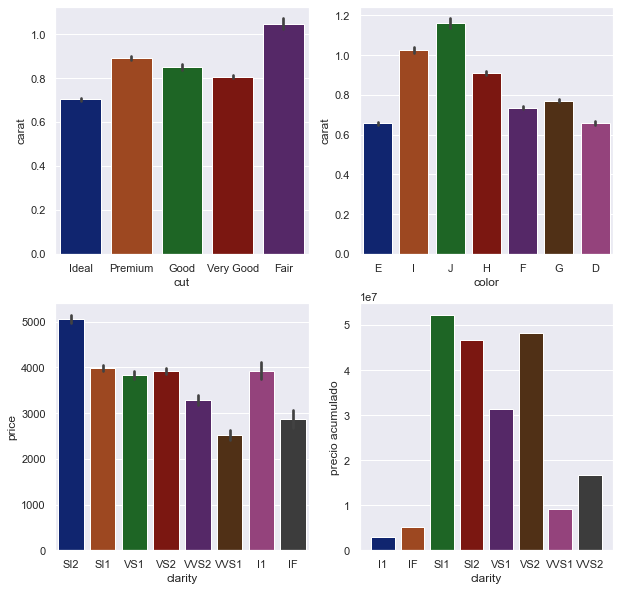

In [130]:
fig, ax = plt.subplots(2, 2, figsize = (10, 10))

sns.barplot(x = 'cut', y = 'carat', data = diamonds_df, ax = ax[0,0])

sns.barplot(x = 'color', y = 'carat', data = diamonds_df, ax = ax[0,1])

sns.barplot(x = 'clarity', y = 'price', data = diamonds_df, ax = ax[1,0])

df_acum = diamonds_df.groupby('clarity').sum()

ax = sns.barplot(x = df_acum.index, y = 'price', data = df_acum, ax = ax[1,1])
ax.set_ylabel('precio acumulado')
plt.plot()

# Fin Dinámica 2

# Graficas Avanzadas

Hasta ahora hemos visto gráficos que conocíamos desde su implementación en matplotlib. Seaborn, tiene implementaciones muchos más complejas, encapsulando una gran cantidad de operaciones y permitiendo la gráfica con información univariada y bivariada de forma relativamente sencilla. Para esto podemos utilizar el método `sns.jointplot`, donde por defecto, nos generara un diagrama de dispersión para un par de variables e histogramas para cada una de las variables involucradas. Existen también múltiples tipos de gráficos que se pueden utilizar para la zona bivariada, la cual se puede encontrar en la documentación:

[Documentación jointplot](https://seaborn.pydata.org/generated/seaborn.jointplot.html?highlight=jointplot#seaborn.jointplot)


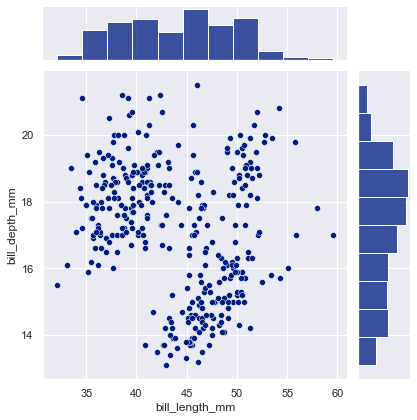

In [77]:
sns.jointplot(x='bill_length_mm', y = 'bill_depth_mm',data=penguins_df)
plt.show()

Cabe destacar que si utilizamos el parámetro `hue`, los histogramas cambiaran hacia diagramas KDE:

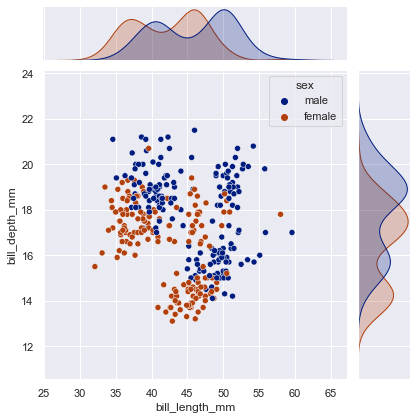

In [78]:
sns.jointplot(x='bill_length_mm', y = 'bill_depth_mm',data=penguins_df, hue='sex')
plt.show()

Anteriormente en las clases de matplotlib, veíamos que, si queríamos hacer diagramas de dispersión para todas las variables numéricas del set de datos, tendríamos que instanciar los subplots e ir graficando uno a uno las interacciones para cada par de variables. Seaborn por su parte, traer el método `sns.pairplot` el cual realizara una matriz de gráficos de bivariados (por defecto, diagramas de dispersión). En la diagonal por defecto se muestran histogramas, pero estos se pueden cambiar, de la misma forma que los gráficos bivariados. La mayoría de las posibilidades de gráficos bivariados son las mismas que los que existen en jointplot. Para ver todas las posibilidades, ver la documentación:

[Documentación pairplot](https://seaborn.pydata.org/generated/seaborn.pairplot.html?highlight=pairplot#seaborn.pairplot)


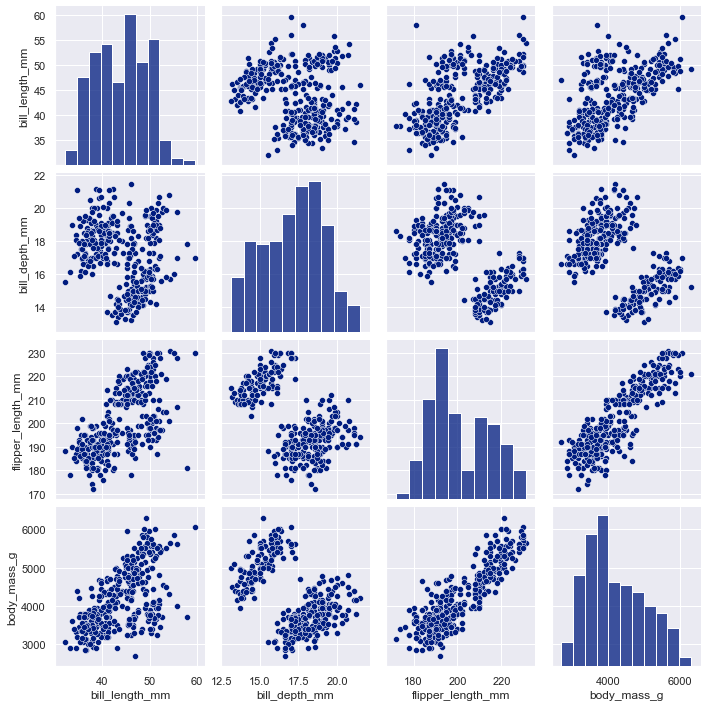

In [44]:
sns.pairplot(data=penguins_df) #Este método como minimo solo necesita el parametro data
plt.show()

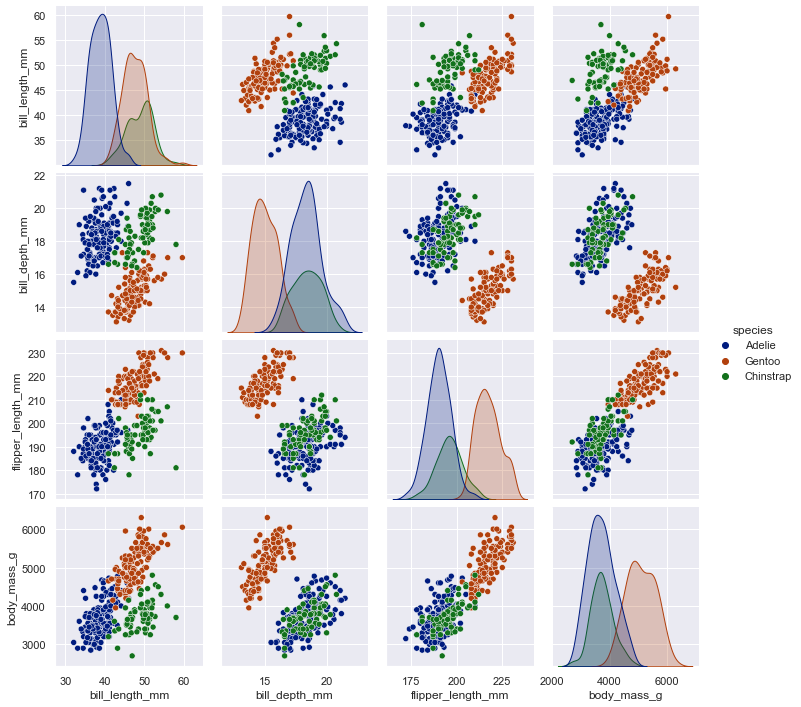

In [45]:
#Si agregamos el parametro hue, la diagonal cambia de histograma a KDE
sns.pairplot(data=penguins_df,hue='species')
plt.show()

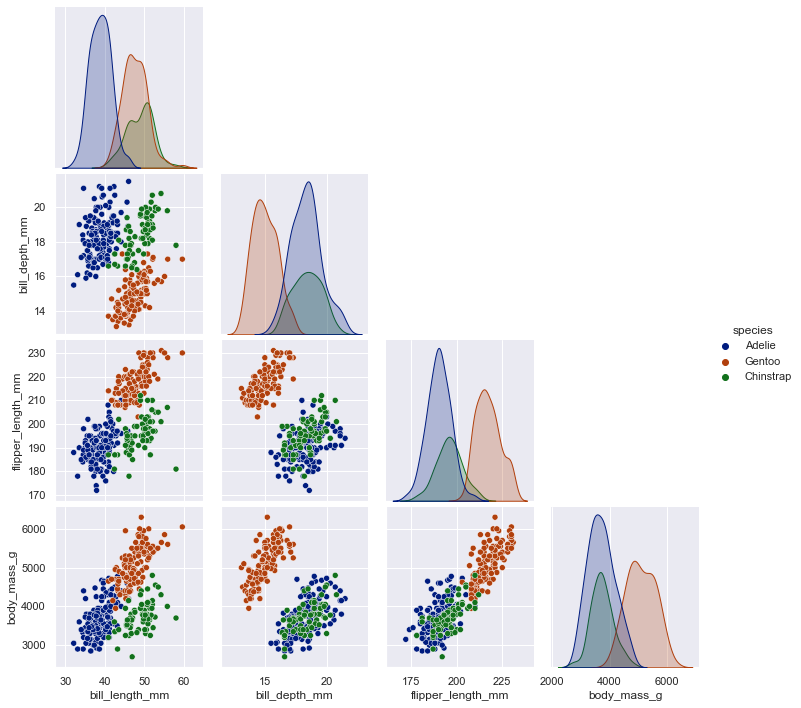

In [46]:
# Y si ocupamos el parametro corner, solo vamos a mostrar desde la diagonal, hacia abajo.
sns.pairplot(penguins_df, corner=True,hue='species')
plt.show()

Además de todos estos gráficos, seaborn presenta un método para poder graficar un diagrama de dispersión, en conjunto con la regresión lineal simple. Para hacer este gráfico, necesitamos llamar al método `sns.regplot()` y no es capaz de separar por alguna columna en específico (por ej, utilizando el parámetro `hue`):

[Documentación Regplot](https://seaborn.pydata.org/generated/seaborn.regplot.html?highlight=regplot#seaborn.regplot)


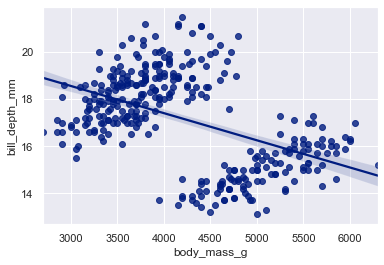

In [131]:
#Regresion lineal simple entre body_mass_g y bill_depth_mm
sns.regplot(x='body_mass_g', y = 'bill_depth_mm',data=penguins_df)
plt.show()

Un método más completo y que permite mayor personalización de los gráficos generados corresponde a `sns.lmplot`. Este método nos permite modelar múltiples relaciones lineales existentes en nuestros datos. En este caso, podemos utilizar los parámetros `hue` para separar por una columna, pero adicionalmente podemos utilizar el parámetro `col` para generar subgráficos dependiendo de los valores existentes en la columna seleccionada. 

[Documentación lmplot](https://seaborn.pydata.org/generated/seaborn.lmplot.html#seaborn.lmplot)


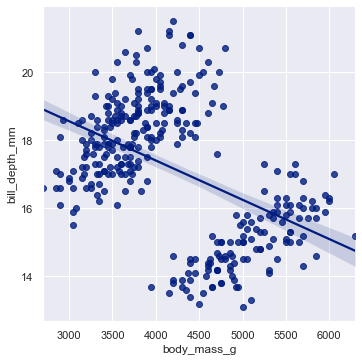

In [132]:
#Generamos un grafico similar a regplot
sns.lmplot(x='body_mass_g', y = 'bill_depth_mm',data=penguins_df)
plt.show()

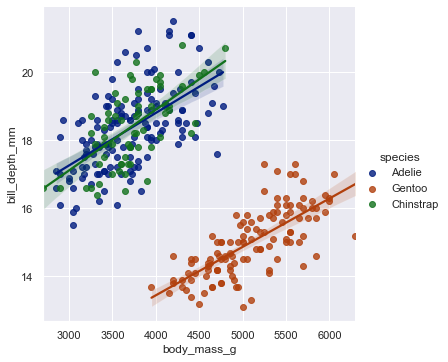

In [133]:
#Pero ahora, podemos ajustar una regresión para cada una de las especies (dado el parametro hue)
sns.lmplot(x='body_mass_g', y = 'bill_depth_mm',data=penguins_df,hue="species",)
plt.show()

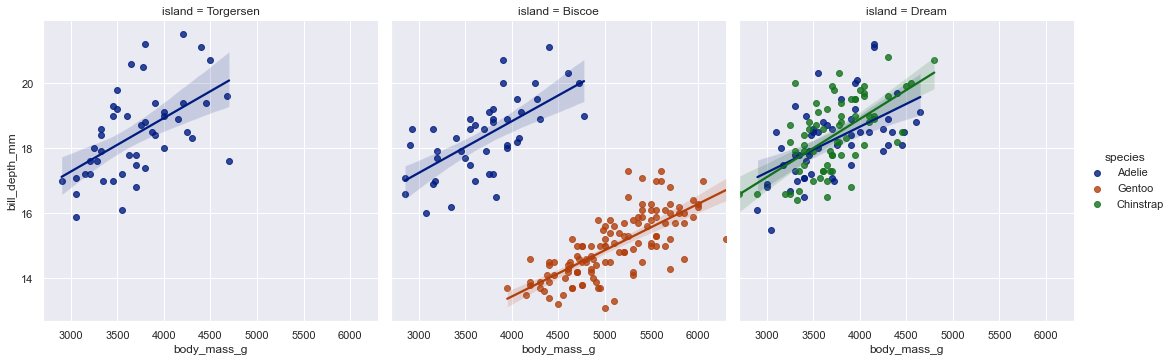

In [134]:
# E inclusive, podemos generar subgraficos con el parametro col (en este caso, estamos separando por isla y ajustando una regresion por especie)
sns.lmplot(x='body_mass_g', y = 'bill_depth_mm',data=penguins_df,hue="species",col='island')
plt.show()

Finalmente, tenemos el método `sns.displot` que nos permite de igual manera que `sns.lmplot`, generar gráficos y subgráficos con múltiples niveles de separación dependiendo de las columnas que nosotros queramos consultar de nuestro set de datos. En este caso, `sns.displot` está especializado para graficar distribuciones univariadas y bivariadas.

[Documentación distplot](https://seaborn.pydata.org/generated/seaborn.displot.html?highlight=displot#seaborn.displot)


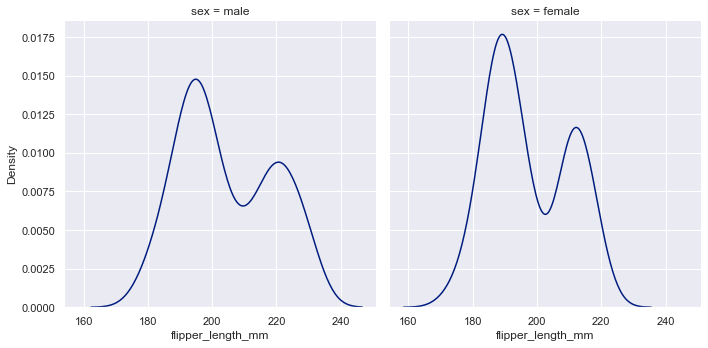

In [140]:
# En este caso, se va a ver la distribución univariada, utilizando KDE, separados por especies y sexo de los pingüinos
sns.displot(data=penguins_df, x="flipper_length_mm", hue="species", col="sex", kind="kde")
plt.show()

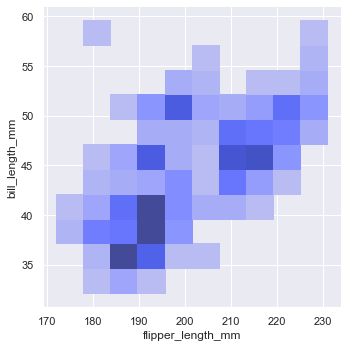

In [136]:
#O en su defecto, un histograma bivariado utilizando el mismo método displot
sns.displot(data=penguins_df, x="flipper_length_mm", y="bill_length_mm")

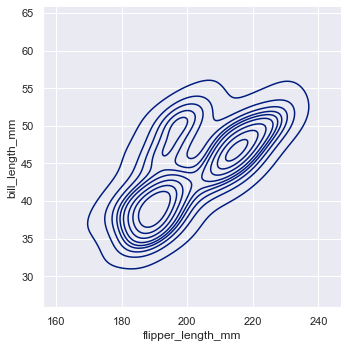

In [137]:
#Alternativamente tenemos los diagramas de KDE bivariados, donde modela de forma similar (pero con superficies)
#la distribución bivariada de dos columnas de nuestro set de datos
sns.displot(x="flipper_length_mm", y="bill_length_mm", kind="kde", data=penguins_df)

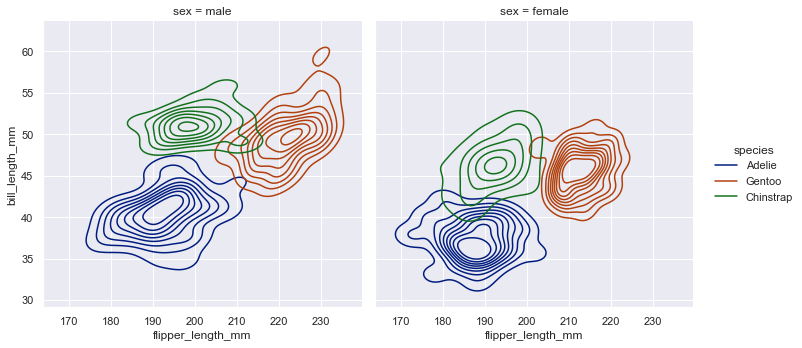

In [138]:
#Y este ultimo gráfico, podemos hacer la misma separación por especies y subgraficos por columna sexo de los pinguinos
sns.displot(x="flipper_length_mm", y="bill_length_mm", hue='species',kind="kde", col="sex",data=penguins_df)

# Dinámica 3

Para finalizar con las dinámicas se van a implementar los gráficos avanzados para los dos sets de datos que hemos estado trabajando. En este caso, se pide que se utilice como color algunas de las variables categóricas de los sets de datos (siempre y cuando, el método de graficar lo permita). 

Para **cada set de datos**:

- 1 jointplot
- 1 pairplot
- 1 regplot
- 1 lmplot
- 1 displot


# Fin Dinámica 3

**Nota: los desafíos vendrán en la dinámica de la infografía**

In [90]:
housing_df = pd.read_csv("http://srodriguez.me/Datasets/kc_house_data.csv")
housing_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


## Joinplot de año de construcción contra pies cuadrados de living

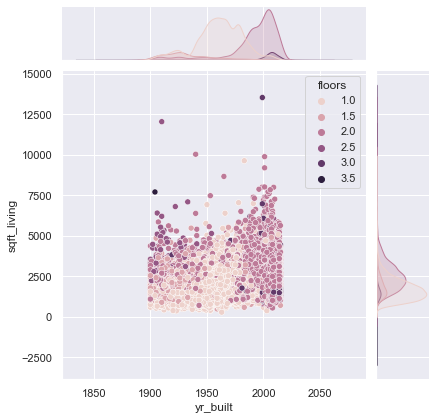

In [161]:
sns.jointplot(x = 'yr_built', y = 'sqft_living', data = housing_df, hue = 'floors')
plt.show()

## Pairplot de variables de área de housing_df

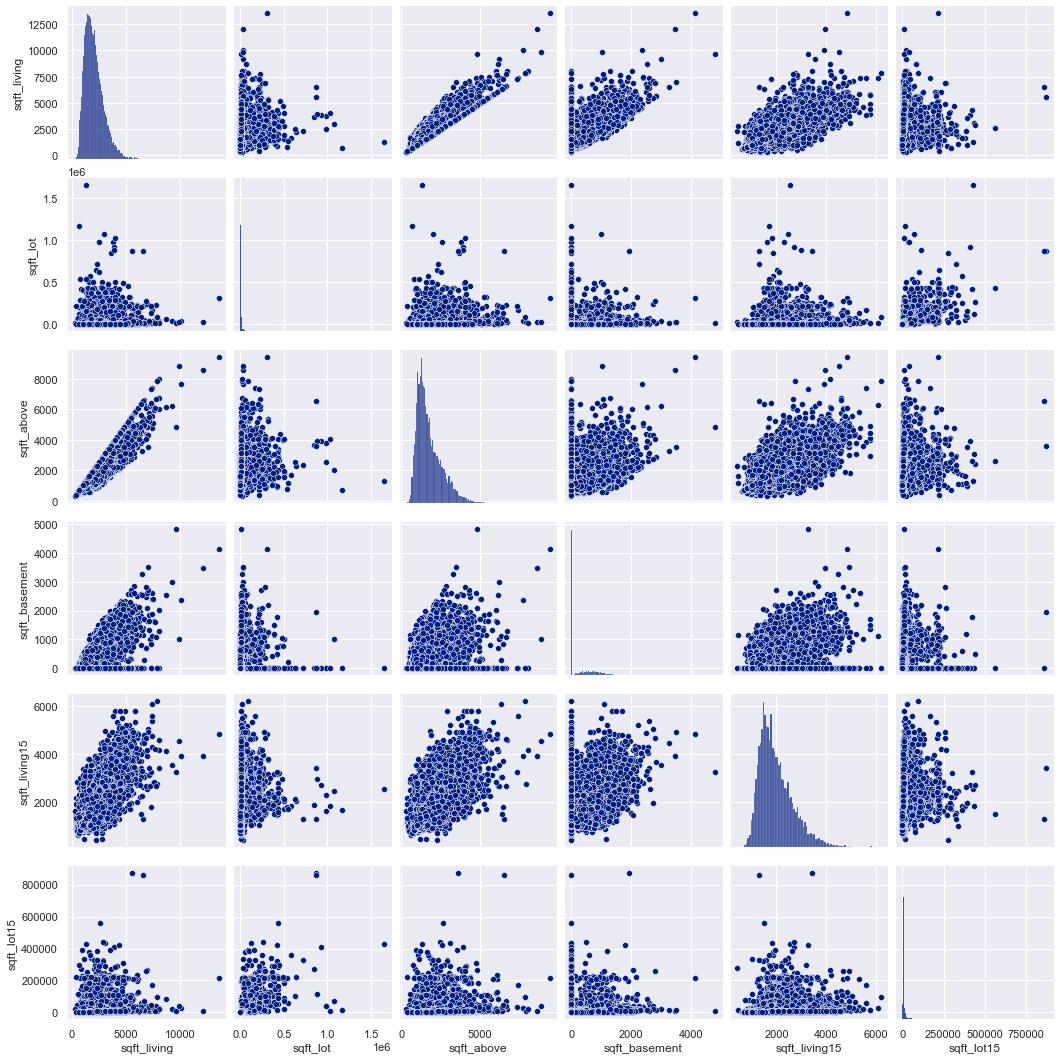

In [141]:
sns.pairplot(data = housing_df[['sqft_living','sqft_lot','sqft_above','sqft_basement','sqft_living15','sqft_lot15']])

## Un regplot del precio contra el grade

<AxesSubplot:xlabel='grade', ylabel='price'>

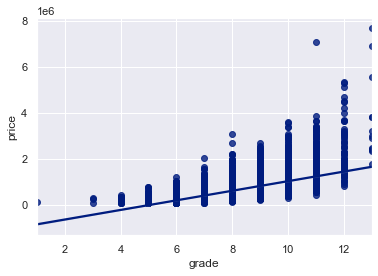

In [154]:
sns.regplot(y = 'price', x = 'grade', data = housing_df)

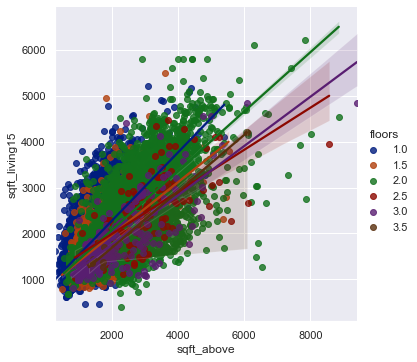

In [164]:
sns.lmplot(y = 'sqft_living15', x = 'sqft_above', hue = 'floors', data = housing_df)

C:\Users\Hugo\anaconda3\lib\site-packages\seaborn\distributions.py:1181: UserWarning: No contour levels were found within the data range.
  cset = contour_func(


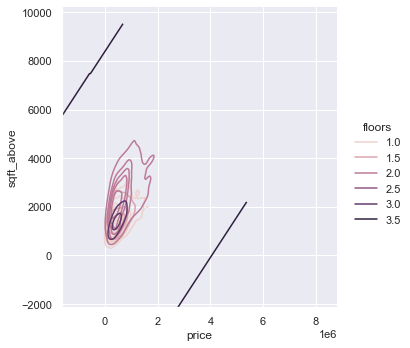

In [169]:
sns.displot(x = 'price', y= 'sqft_above', hue = 'floors', data = housing_df, kind = 'kde')